In [30]:
include("PVCR.jl");

In [31]:
using DataFrames
using CSV

In [32]:
CNFL_res = CSV.read("data/hist_CNFL_res.csv");

In [33]:
CNFL_res

,Month,Bloque 0-30 kWh,Bloque 31-200 kWh,Bloque 201-300 kWh,Bloque mayor a 300 kWh
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Apr-16,2177.7,72.59,111.37,115.14
2,May-16,2177.7,72.59,111.37,115.14
3,Jun-16,2177.7,72.59,111.37,115.14
4,Jul-16,2274.6,75.82,116.34,120.26
5,Aug-16,2274.6,75.82,116.34,120.26
6,Sep-16,2274.6,75.82,116.34,120.26
7,Oct-16,2212.2,73.74,113.15,116.97
8,Nov-16,2212.2,73.74,113.15,116.97
9,Dec-16,2212.2,73.74,113.15,116.97


In [ ]:
R_CNFL = Tariff("CNFL",
                "Residential",
                [(0:30.99, 1893.90), (31:200.99, 63.13), (201:300, 96.87), (301:1000, 100.14)],
                nothing,
                0.06,
                21.03,
                0.01,
                [0.992832136 0.999770704 1.00427654 0.983489891 1.009385917 1.012387984 0.979508228 0.994153679 0.97686098 1.015651323 1.015252586 1.016430032]);

In [14]:
CNFL_res[1,:]

DataFrameRow (row 1)
Month                   Apr-16
Bloque 0-30 kWh         2177.7
Bloque 31-200 kWh       72.59
Bloque 201-300 kWh      111.37
Bloque mayor a 300 kWh  115.14

In [18]:
p_cost =  [(0:3.0, 2000), (3.0:5.0, 1800), (5.0:10.0, 1700), (10.0:15.0, 1500), (15.0:20.0, 1350), (20.0:50.0, 1200)]

6-element Array{Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Int64},1}:
 (0.0:1.0:3.0, 2000)  
 (3.0:1.0:5.0, 1800)  
 (5.0:1.0:10.0, 1700) 
 (10.0:1.0:15.0, 1500)
 (15.0:1.0:20.0, 1350)
 (20.0:1.0:50.0, 1200)

In [19]:
function print_tariff(range)
    
        x = []
        y = []
        for block in range 
            x = vcat(x,block[1])
            y = vcat(y, block[2]*ones(length(block[1])))
        end
    
    plot(x,y)

end

print_tariff (generic function with 1 method)

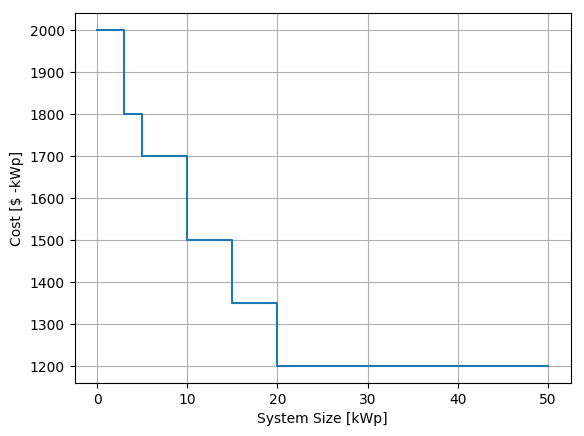

In [28]:
print_tariff(p_cost)
xlabel("System Size [kWp]")
ylabel("Cost [\$ -kWp]")
grid("on")

In [43]:
dump(R_CNFL)

Tariff
  provider: String "CNFL"
  category: String "Residential"
  e_cost: Array{Any}((3,))
    1: Tuple{UnitRange{Int64},Float64}
      1: UnitRange{Int64}
        start: Int64 0
        stop: Int64 200
      2: Float64 63.13
    2: Tuple{UnitRange{Int64},Float64}
      1: UnitRange{Int64}
        start: Int64 200
        stop: Int64 300
      2: Float64 96.87
    3: Tuple{UnitRange{Int64},Float64}
      1: UnitRange{Int64}
        start: Int64 300
        stop: Int64 1000
      2: Float64 100.14
  p_cost: Nothing nothing
  increase: Float64 0.06
  access: Float64 21.03
  street_light: Float64 3.51
  access_increase: Float64 0.01
  behaviour: Array{Float64}((1, 12)) [0.992832 0.999771 … 1.01525 1.01643]


In [30]:
r

1003-element Array{Any,1}:
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000